# **Titanic Prediction Model**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data['family_size'] = train_data.SibSp + train_data.Parch + 1
test_data['family_size'] = test_data.SibSp + test_data.Parch + 1
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [19]:
print(train_data.isna().sum())
print("--------------")
print(test_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64
--------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
family_size      0
dtype: int64


In [8]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


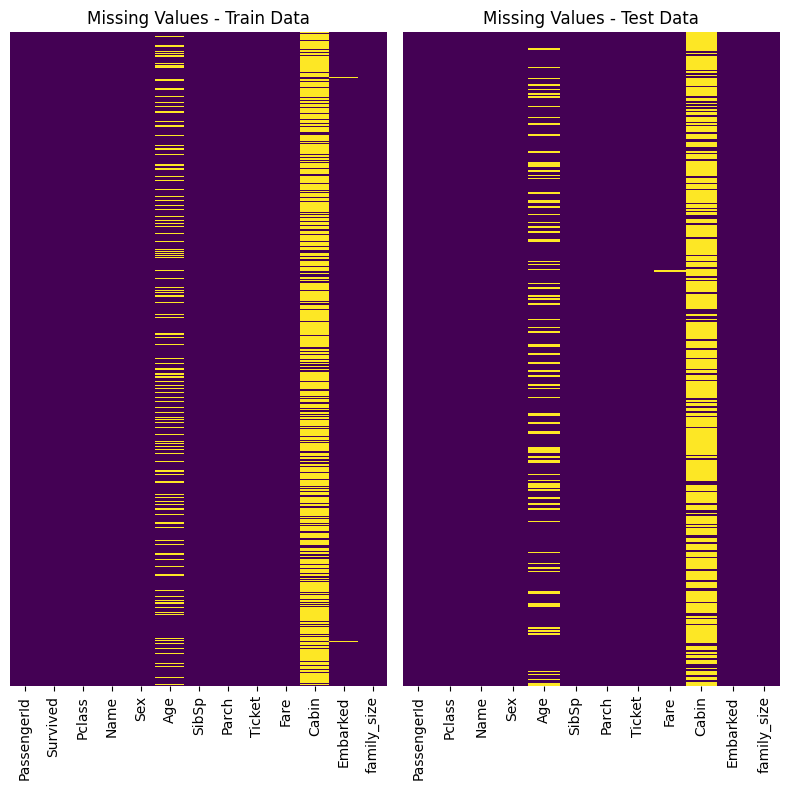

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))


cols = [train_data.isna(), test_data.isna()]

for i, col in enumerate(cols):
    sns.heatmap(col, ax=axes[i], cbar=False, cmap='viridis', yticklabels=False)
    axes[i].set_title(f"Missing Values - {'Train' if i == 0 else 'Test'} Data")

plt.tight_layout()
plt.show()

In [20]:
train_data = train_data.dropna(subset=['Embarked'])
train_data.reset_index(drop=True)
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
family_size      0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

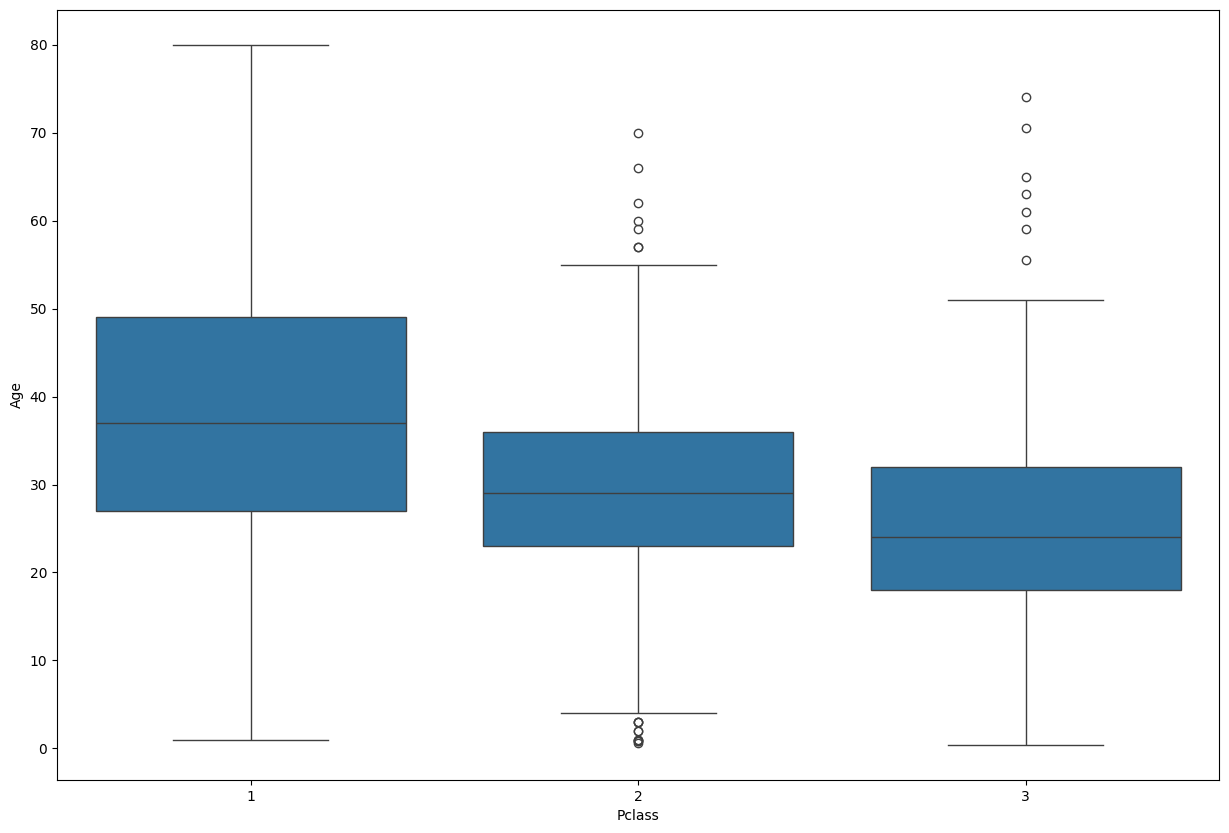

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x=train_data['Pclass'], y=train_data['Age'])

In [23]:
pclass_mean_by_age=train_data.groupby(['Pclass'])['Age'].mean()
pd.DataFrame(data=pclass_mean_by_age)

,Age
Pclass,
1,38.105543
2,29.877630
3,25.140620


In [28]:
def get_age(age_value, pclass_value):
    if pd.isnull(age_value):
        if pclass_value == 1:
            return 38
        elif pclass_value == 2:
            return 30
        else:
            return 25
    else:
        return age_value

train_data['Age'] = train_data.apply(lambda row: get_age(row['Age'], row['Pclass']), axis=1)
test_data['Age'] = test_data.apply(lambda row: get_age(row['Age'], row['Pclass']), axis=1)

/tmp/ipykernel_99277/3550527489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'] = train_data.apply(lambda row: get_age(row['Age'], row['Pclass']), axis=1)


In [31]:
# data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
# data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q':3})

sex_dummis_train = pd.get_dummies(train_data['Sex']).astype(int)
train_data = pd.concat([train_data, sex_dummis_train], axis=1).drop('Sex', axis=1)

sex_dummies_test = pd.get_dummies(test_data['Sex']).astype(int)
test_data = pd.concat([test_data, sex_dummies_test], axis=1).drop('Sex', axis=1)

In [32]:
embarked_dummies_train = pd.get_dummies(train_data['Embarked']).astype(int)
train_data = pd.concat([train_data, embarked_dummies_train], axis=1).drop('Embarked', axis=1)
train_data

embarked_dummies_test = pd.get_dummies(test_data['Embarked']).astype(int)
test_data = pd.concat([test_data, embarked_dummies_test], axis=1).drop('Embarked', axis=1)

<Axes: xlabel='Age_bin', ylabel='Count'>

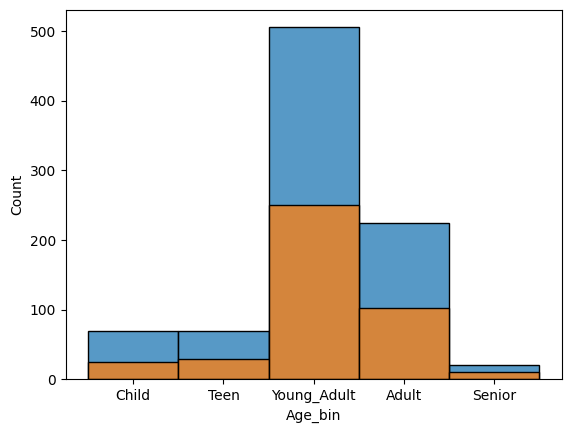

In [33]:
train_data['Age_bin'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young_Adult', 'Adult', 'Senior'])
sns.histplot(data=train_data, x='Age_bin')

test_data['Age_bin'] = pd.cut(test_data['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young_Adult', 'Adult', 'Senior'])
sns.histplot(data=test_data, x='Age_bin')

In [34]:
fare_dummies_train = pd.get_dummies(train_data['Age_bin']).astype(int)
train_data = pd.concat([train_data, fare_dummies_train], axis=1).drop(['Age', 'Age_bin'], axis=1)

fare_dummies_test = pd.get_dummies(test_data['Age_bin']).astype(int)
test_data = pd.concat([test_data, fare_dummies_test], axis=1).drop(['Age', 'Age_bin'], axis=1)

train_data

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,family_size,female,male,C,Q,S,Child,Teen,Young_Adult,Adult,Senior
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,2,0,1,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,2,1,0,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,2,1,0,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,NaN,1,0,1,0,0,1,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,B42,1,1,0,0,0,1,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,NaN,4,1,0,0,0,1,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,C148,1,0,1,1,0,0,0,0,1,0,0


In [35]:
train_data = train_data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)
test_data = test_data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)

In [36]:
train_data.describe()

,Survived,Pclass,SibSp,Parch,Fare,family_size,female,male,C,Q,S,Child,Teen,Young_Adult,Adult,Senior
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.524184,0.382452,32.096681,1.906637,0.350956,0.649044,0.188976,0.086614,0.724409,0.077615,0.078740,0.568054,0.251969,0.023622
std,0.486260,0.834700,1.103705,0.806761,49.697504,1.614703,0.477538,0.477538,0.391710,0.281427,0.447063,0.267716,0.269484,0.495626,0.434388,0.151954
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
print(train_data.isna().sum())
test_data.Fare = test_data.Fare.fillna(train_data.Fare.mean())
print(test_data.isna().sum())

Survived       0
Pclass         0
SibSp          0
Parch          0
Fare           0
family_size    0
female         0
male           0
C              0
Q              0
S              0
Child          0
Teen           0
Young_Adult    0
Adult          0
Senior         0
dtype: int64
Pclass         0
SibSp          0
Parch          0
Fare           0
family_size    0
female         0
male           0
C              0
Q              0
S              0
Child          0
Teen           0
Young_Adult    0
Adult          0
Senior         0
dtype: int64


<Axes: >

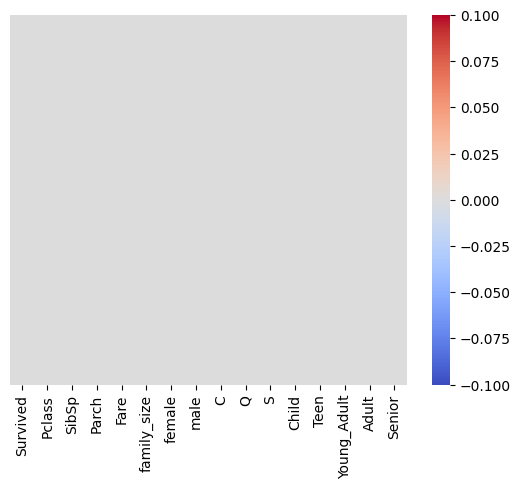

In [42]:
sns.heatmap(train_data.isna(), yticklabels=False, cbar=True, cmap="coolwarm")

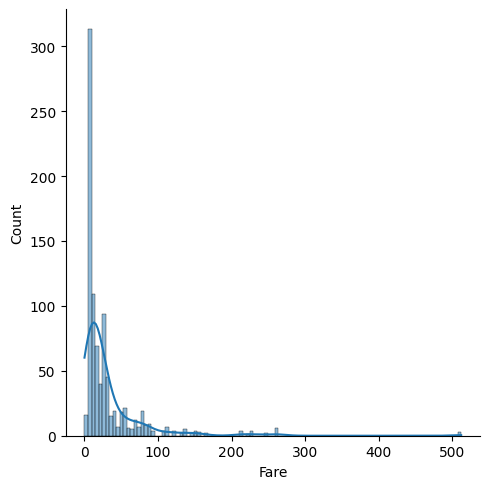

In [44]:
sns.displot(data=train_data, x='Fare', kde=True)

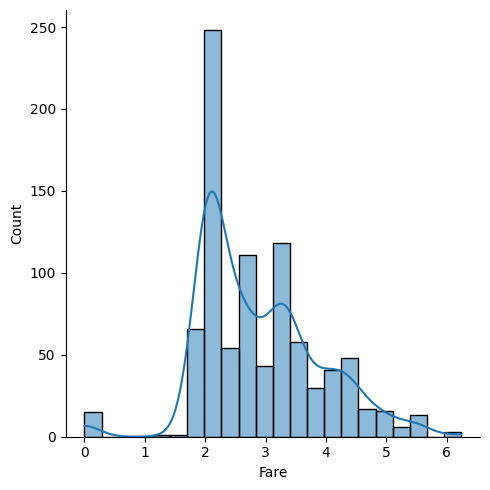

In [45]:
fare = train_data['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
sns.displot(data=fare, kde=True)

In [46]:
train_data['Fare'] = train_data['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
test_data['Fare'] = test_data['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

In [49]:
from sklearn.model_selection import train_test_split
Xt_train = train_data.drop('Survived', axis=1)
yt_train = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(Xt_train, yt_train, test_size=0.3)

In [50]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(max_iter=500)

lor.fit(X_train, y_train)

pred = lor.predict(X_test)

In [51]:
from sklearn.linear_model import LogisticRegressionCV

lorCV = LogisticRegressionCV(cv=10, max_iter=500)

lorCV.fit(X_train, y_train)

pred_lorCV = lorCV.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, accuracy_score

print("Lor")
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

print('lorCV')
print(accuracy_score(y_test, pred_lorCV))
print(classification_report(y_test, pred_lorCV))

Lor
0.8239700374531835
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       166
           1       0.81      0.70      0.75       101

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267

lorCV
0.8239700374531835
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       166
           1       0.81      0.70      0.75       101

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import scipy.stats as st

In [54]:
rfc = RandomForestClassifier()

In [55]:
param_grid ={'max_depth': st.randint(6, 11),
             'n_estimators':st.randint(300, 500),
             'max_features':np.arange(0.5,.81, 0.05),
            'max_leaf_nodes':st.randint(6, 10)}

grid = RandomizedSearchCV(rfc,
                    param_grid, cv=10,
                    scoring='accuracy',
                    verbose=1,n_iter=20)

grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7faa61984bc0>,
                                        'max_features': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7faa61991dc0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7faa6c80bd10>},
                   scoring='accuracy', verbose=1)

In [56]:
grid.best_estimator_

RandomForestClassifier(max_depth=6, max_features=np.float64(0.5),
                       max_leaf_nodes=9, n_estimators=483)

In [58]:
pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.8352059925093633

In [59]:
pred_test_data = grid.best_estimator_.predict(test_data)

In [60]:
passengerId = pd.read_csv('test.csv')

In [61]:
passengerId = passengerId['PassengerId']
passengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [71]:
pred_test_data = pd.DataFrame(pred_test_data).rename(columns={0: "Survived"})

In [72]:
result = pd.concat([passengerId, pred_test_data], axis=1)

In [76]:
result.to_csv('submission.csv', index=False, columns=['PassengerId', 'Survived'])